In [37]:
import numpy as np
import pandas as pd
import itertools

from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

from sklearn import mixture

print(__doc__)

Automatically created module for IPython interactive environment


In [70]:
# Number of samples per component
n_samples = 500

# Generate random sample, two components
np.random.seed(0)
C = np.array([[0., -0.1], [1.7, .4]])
X = np.r_[np.dot(np.random.randn(n_samples, 2), C),
          .7 * np.random.randn(n_samples, 2) + np.array([-6, 3])]

X = np.r_[.7 * np.random.randn(2*n_samples, 2) + np.array([-6, 3]), np.random.randn(2*n_samples, 2)]

X2 = np.r_[np.random.randn(n_samples, 2) + np.array([-6, 2]),
          .7 * np.random.randn(n_samples, 2) + np.array([-6, 3])]


lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(X)
        bic.append(gmm.bic(X))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

bic = np.array(bic)
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                              'darkorange'])
clf = best_gmm
bars = []

In [73]:
X
clf.covariances_

array([ 0.98273151,  0.47524645])

ValueError: expected square matrix

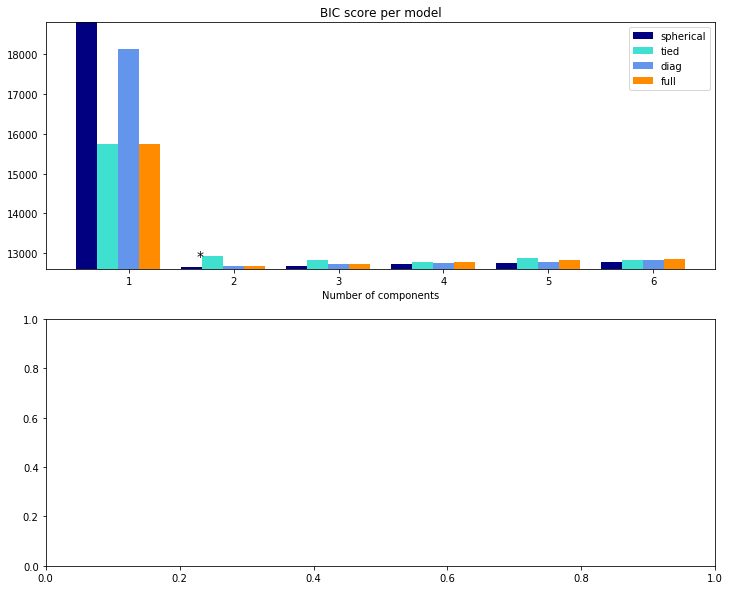

In [72]:
# Plot the BIC scores
plt.figure(figsize=(12, 10))
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.2, color=color))
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC score per model')
xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
    .2 * np.floor(bic.argmin() / len(n_components_range))
plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
spl.set_xlabel('Number of components')
spl.legend([b[0] for b in bars], cv_types)

# Plot the winner
splot = plt.subplot(2, 1, 2)
Y_ = clf.predict(X)
for i, (mean, cov, color) in enumerate(zip(clf.means_, clf.covariances_,
                                           color_iter)):
    v, w = linalg.eigh(cov)
    if not np.any(Y_ == i):
        continue
    plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], .8, color=color)

    # Plot an ellipse to show the Gaussian component
    angle = np.arctan2(w[0][1], w[0][0])
    angle = 180. * angle / np.pi  # convert to degrees
    v = 2. * np.sqrt(2.) * np.sqrt(v)
    ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(.5)
    splot.add_artist(ell)

plt.xticks(())
plt.yticks(())
plt.subplots_adjust(hspace=.35, bottom=.02)
plt.show()


In [7]:
np.random.seed(0)
C = np.array([[0., -0.1], [1.7, .4]])
X = np.r_[np.random.randn(n_samples, 2),
          np.random.randn(n_samples, 2) + np.array([-6, 3])]
C

array([[ 0. , -0.1],
       [ 1.7,  0.4]])

In [16]:
for i, (mean, cov, color) in enumerate(zip(clf.means_, clf.covariances_,
                                           color_iter)):
    print(color)

cornflowerblue
darkorange


In [22]:
v, w = linalg.eigh(clf.covariances_[0])

In [23]:
clf.covariances_[0]

array([[ 2.88961965,  0.68164604],
       [ 0.68164604,  0.17027464]])

In [24]:
clf.covariances_

array([[[ 2.88961965,  0.68164604],
        [ 0.68164604,  0.17027464]],

       [[ 0.46415545, -0.00870309],
        [-0.00870309,  0.45436652]]])

In [32]:
len(X2)

1000

In [28]:
np.cov(X2)

array([[ 30.58363641,  27.35569367,  28.84739191, ...,  32.73386004,
         30.23934658,  28.65235383],
       [ 27.35569367,  24.46844339,  25.80270069, ...,  29.27897246,
         27.04774183,  25.62824786],
       [ 28.84739191,  25.80270069,  27.20971466, ...,  30.87554654,
         28.52264754,  27.02574897],
       ..., 
       [ 32.73386004,  29.27897246,  30.87554654, ...,  35.03525804,
         32.36536445,  30.66679605],
       [ 30.23934658,  27.04774183,  28.52264754, ...,  32.36536445,
         29.89893253,  28.32980507],
       [ 28.65235383,  25.62824786,  27.02574897, ...,  30.66679605,
         28.32980507,  26.84302708]])

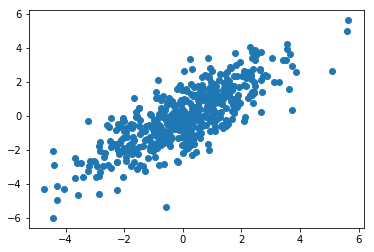

In [49]:
C2 = np.array([[0., 1.1], [1.7, 1.4]])
points = pd.DataFrame(data = np.dot(np.random.randn(n_samples, 2), C2), columns=['x','y'])
plt.scatter(points.x, points.y)


In [50]:
points.shape

(500, 2)

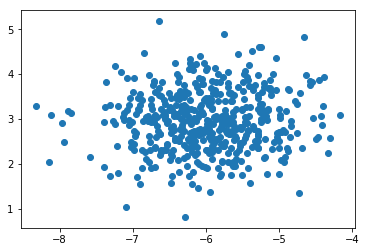

In [55]:
X2 = 0.7 * np.random.randn(2*n_samples, 2) + np.array([-6, 3])

points2 = pd.DataFrame(data = 0.7 * np.random.randn(n_samples, 2) + np.array([-6, 3]),
                       columns=['x','y'])
plt.scatter(points2.x, points2.y)

In [56]:
lowest_bic2 = np.infty
bic2 = []
n_components_range = range(1, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm2 = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm2.fit(X2)
        bic2.append(gmm.bic(X2))
        if bic2[-1] < lowest_bic2:
            lowest_bic2 = bic[-1]
            best_gmm2 = gmm

bic2 = np.array(bic2)
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                              'darkorange'])
clf2 = best_gmm2
bars2 = []

In [57]:
clf2.covariances_

array([[[ 0.40737943,  0.0789959 ],
        [ 0.0789959 ,  0.02348348]],

       [[ 0.39932798, -0.13025826],
        [-0.13025826,  0.34133467]],

       [[ 0.4095447 ,  0.09929725],
        [ 0.09929725,  0.03426007]],

       [[ 0.7296857 ,  0.18048827],
        [ 0.18048827,  0.0526979 ]],

       [[ 1.09817494,  0.26847951],
        [ 0.26847951,  0.07548993]],

       [[ 0.363667  , -0.09018645],
        [-0.09018645,  0.29097702]]])

In [80]:
# Number of samples per component
n_samples = 500

# Generate random sample, two components
np.random.seed(0)
C = np.array([[0., -0.1], [1.7, .4]])
X = np.r_[np.dot(np.random.randn(n_samples, 2), C),
          .7 * np.random.randn(n_samples, 2) + np.array([-6, 3])]
data1 = .7 * np.random.randn(2*n_samples, 2) + np.array([-6, 3])
data2 = np.random.randn(2*n_samples, 2)
X = np.r_[data1, data2]

X2 = np.r_[np.random.randn(n_samples, 2) + np.array([-6, 2]),
          .7 * np.random.randn(n_samples, 2) + np.array([-6, 3])]

cv_types = ['spherical', 'tied', 'diag', 'full']
gmm = mixture.GaussianMixture(n_components=2,covariance_type=cv_type)
gmm.fit(X)



GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=2, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [81]:
gmm.covariances_

array([[[  4.81389078e-01,  -4.83344419e-04],
        [ -4.83344419e-04,   4.69115129e-01]],

       [[  9.57700195e-01,  -2.16561029e-02],
        [ -2.16561029e-02,   1.00773714e+00]]])

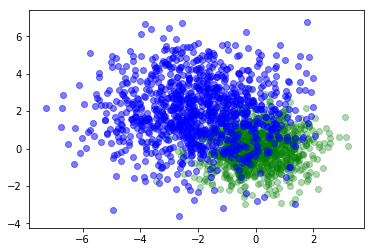

In [112]:
#### Generating random data
data1 = 1.7 * np.random.randn(2*n_samples, 2) + np.array([-2, 2])
data2 = np.random.randn(2*n_samples, 2)

#### Generating dataframes
points1 = pd.DataFrame(data = data1,columns=['x','y'])
points2 = pd.DataFrame(data = data2,columns=['x','y'])

#### Ploting data
plt.scatter(points2.x, points2.y,color='green',alpha=0.3)
plt.scatter(points1.x, points1.y,color='blue',alpha=0.5)

In [113]:
X = np.r_[data1, data2]
gmm = mixture.GaussianMixture(n_components=2,covariance_type='spherical')
gmm.fit(X)

GaussianMixture(covariance_type='spherical', init_params='kmeans',
        max_iter=100, means_init=None, n_components=2, n_init=1,
        precisions_init=None, random_state=None, reg_covar=1e-06,
        tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
        weights_init=None)

In [114]:
gmm.covariances_

array([ 2.7668644 ,  1.12116833])